In [19]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
features = ['pregnency', 'glucose', 'BP', 'skin', 'insulin', 'BMI', 'DiabetesPedigree', 'age', 'class']
X_features = ['pregnency', 'glucose', 'BP', 'skin', 'insulin', 'BMI', 'DiabetesPedigree', 'age']
data = pd.read_csv('datasets_14370_19291_pima-indians-diabetes.csv', names=features)

In [20]:
X = data.iloc[:,0:8]
#d = preprocessing.normalize(X)
#X = pd.DataFrame(d, columns=X_features)

In [21]:
X['BP']=X['BP'].replace(0,X['BP'].mean())
X['skin']=X['skin'].replace(0,X['skin'].mean())
X['BMI']=X['BMI'].replace(0,X['BMI'].mean())
X['age']=X['age'].replace(0,X['age'].mean())

In [22]:
for col in X_features:
    X[col]=X[col]/X[col].max()

In [23]:
X

,pregnency,glucose,BP,skin,insulin,BMI,DiabetesPedigree,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,0.470588,0.919598,0.524590,0.207439,0.000000,0.347243,0.277686,0.395062
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370
766,0.058824,0.633166,0.491803,0.207439,0.000000,0.448584,0.144215,0.580247


In [24]:
Y = data.iloc[:,8]

In [25]:
Y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: class, dtype: int64

In [35]:
model = Sequential()
model.add(Dense(16, input_dim=8, kernel_initializer='HeUniform', kernel_regularizer=l1(0.001), activation='relu'))
#model.add(Dense(8, kernel_initializer='random_uniform', activation='relu',bias_initializer='zeros'))
#model.add(Dense(64, kernel_initializer='GlorotUniform', kernel_regularizer=l1(0.01), activation='relu'))
#model.add(Dense(64, kernel_initializer='GlorotUniform', kernel_regularizer=l1(0.01), activation='relu'))
model.add(Dense(1, kernel_initializer='HeUniform', activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,restore_best_weights=True,patience=400)

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=10, callbacks=[es])

Epoch 1/1000
52/52 [==============================] - 1s 11ms/step - loss: 0.7390 - accuracy: 0.5856 - val_loss: 0.7163 - val_accuracy: 0.6614
Epoch 2/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.7235 - accuracy: 0.6420 - val_loss: 0.7038 - val_accuracy: 0.6575
Epoch 3/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.6459 - val_loss: 0.6961 - val_accuracy: 0.6614
Epoch 4/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.6459 - val_loss: 0.6901 - val_accuracy: 0.6614
Epoch 5/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.6459 - val_loss: 0.6844 - val_accuracy: 0.6614
Epoch 6/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.6459 - val_loss: 0.6788 - val_accuracy: 0.6614
Epoch 7/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.6440 - val_loss: 0.6739 - val_accuracy: 0.6614
Epoch

52/52 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7685 - val_loss: 0.5319 - val_accuracy: 0.7520
Epoch 59/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7588 - val_loss: 0.5322 - val_accuracy: 0.7677
Epoch 60/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7568 - val_loss: 0.5306 - val_accuracy: 0.7638
Epoch 61/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7588 - val_loss: 0.5299 - val_accuracy: 0.7598
Epoch 62/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7568 - val_loss: 0.5288 - val_accuracy: 0.7598
Epoch 63/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7646 - val_loss: 0.5288 - val_accuracy: 0.7677
Epoch 64/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7588 - val_loss: 0.5282 - val_accuracy: 0.7717
Epoch 65/1000

52/52 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7685 - val_loss: 0.5192 - val_accuracy: 0.7480
Epoch 116/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7626 - val_loss: 0.5188 - val_accuracy: 0.7559
Epoch 117/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7685 - val_loss: 0.5189 - val_accuracy: 0.7520
Epoch 118/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7724 - val_loss: 0.5196 - val_accuracy: 0.7520
Epoch 119/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7782 - val_loss: 0.5198 - val_accuracy: 0.7520
Epoch 120/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7626 - val_loss: 0.5187 - val_accuracy: 0.7559
Epoch 121/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7685 - val_loss: 0.5195 - val_accuracy: 0.7520
Epoch 1

Epoch 172/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7704 - val_loss: 0.5239 - val_accuracy: 0.7520
Epoch 173/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7802 - val_loss: 0.5247 - val_accuracy: 0.7559
Epoch 174/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7743 - val_loss: 0.5248 - val_accuracy: 0.7520
Epoch 175/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7743 - val_loss: 0.5311 - val_accuracy: 0.7362
Epoch 176/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7724 - val_loss: 0.5234 - val_accuracy: 0.7480
Epoch 177/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7704 - val_loss: 0.5268 - val_accuracy: 0.7441
Epoch 178/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7743 - val_loss: 0.5251 - val_accuracy:

Epoch 229/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7821 - val_loss: 0.5263 - val_accuracy: 0.7441
Epoch 230/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7802 - val_loss: 0.5290 - val_accuracy: 0.7480
Epoch 231/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7704 - val_loss: 0.5282 - val_accuracy: 0.7520
Epoch 232/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7763 - val_loss: 0.5284 - val_accuracy: 0.7480
Epoch 233/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7724 - val_loss: 0.5291 - val_accuracy: 0.7441
Epoch 234/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7724 - val_loss: 0.5299 - val_accuracy: 0.7402
Epoch 235/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7763 - val_loss: 0.5267 - val_accuracy:

52/52 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7665 - val_loss: 0.5286 - val_accuracy: 0.7559
Epoch 286/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7763 - val_loss: 0.5297 - val_accuracy: 0.7441
Epoch 287/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7724 - val_loss: 0.5291 - val_accuracy: 0.7520
Epoch 288/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7782 - val_loss: 0.5283 - val_accuracy: 0.7559
Epoch 289/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7763 - val_loss: 0.5297 - val_accuracy: 0.7480
Epoch 290/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7743 - val_loss: 0.5310 - val_accuracy: 0.7402
Epoch 291/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7763 - val_loss: 0.5292 - val_accuracy: 0.7480
Epoch 2

Epoch 342/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7743 - val_loss: 0.5311 - val_accuracy: 0.7402
Epoch 343/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7763 - val_loss: 0.5312 - val_accuracy: 0.7402
Epoch 344/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7763 - val_loss: 0.5294 - val_accuracy: 0.7480
Epoch 345/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7743 - val_loss: 0.5351 - val_accuracy: 0.7402
Epoch 346/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7665 - val_loss: 0.5301 - val_accuracy: 0.7480
Epoch 347/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7782 - val_loss: 0.5301 - val_accuracy: 0.7559
Epoch 348/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7782 - val_loss: 0.5351 - val_accuracy:

Epoch 399/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7821 - val_loss: 0.5372 - val_accuracy: 0.7323
Epoch 400/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7802 - val_loss: 0.5319 - val_accuracy: 0.7402
Epoch 401/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7743 - val_loss: 0.5365 - val_accuracy: 0.7362
Epoch 402/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7763 - val_loss: 0.5312 - val_accuracy: 0.7480
Epoch 403/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7763 - val_loss: 0.5313 - val_accuracy: 0.7480
Epoch 404/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7724 - val_loss: 0.5292 - val_accuracy: 0.7520
Epoch 405/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7724 - val_loss: 0.5302 - val_accuracy:

Epoch 456/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7782 - val_loss: 0.5317 - val_accuracy: 0.7441
Epoch 457/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7763 - val_loss: 0.5369 - val_accuracy: 0.7323
Epoch 458/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7724 - val_loss: 0.5290 - val_accuracy: 0.7480
Epoch 459/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7782 - val_loss: 0.5380 - val_accuracy: 0.7362
Epoch 460/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7743 - val_loss: 0.5305 - val_accuracy: 0.7441
Epoch 461/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7763 - val_loss: 0.5302 - val_accuracy: 0.7480
Epoch 462/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7782 - val_loss: 0.5315 - val_accuracy:

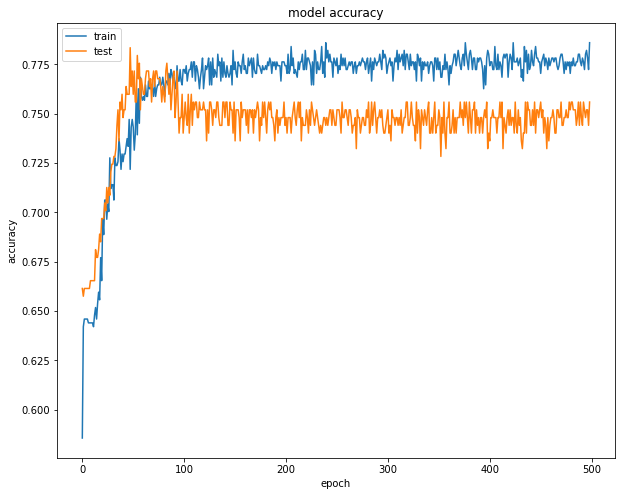

In [40]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

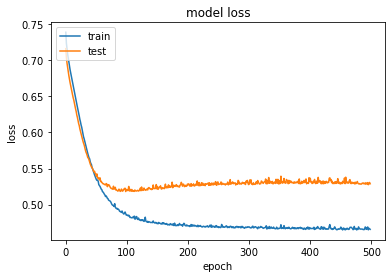

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
model.evaluate(X_val, y_val)

8/8 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7598


[0.5181456208229065, 0.7598425149917603]

In [43]:
model.evaluate(X_train,y_train)

17/17 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7724


[0.48630526661872864, 0.7723735570907593]